In [1]:
import numpy as np
import tqdm 
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib import colors
import matplotlib as mpl 
import astropy.units as u
from astropy.constants import G, M_sun
import sys
import os

sys.path.append('../my_funcs/')
from pipeline_main import pipeline, dist

top = os.getenv('HOME')+'/codes/dispatch2/'
os.chdir(top+'experiments/ISM/python')
import sys
sys.path.insert(0,top+'utilities/python')
import dispatch as dis


# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
mpl.rc('font', **font)


In [2]:
datai = pipeline(snap = 343, run = 'sink122core02', sink_id = 122)
data = pipeline(snap = 400, run = 'sink122core02', sink_id = 122)

Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 5026/5026 [00:06<00:00, 721.61it/s]


Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 5026/5026 [00:06<00:00, 771.75it/s]


In [3]:
data.sink_evolution(start=343)

Loading all snapshots - this might take awhile


100%|██████████| 58/58 [04:02<00:00,  4.18s/it]


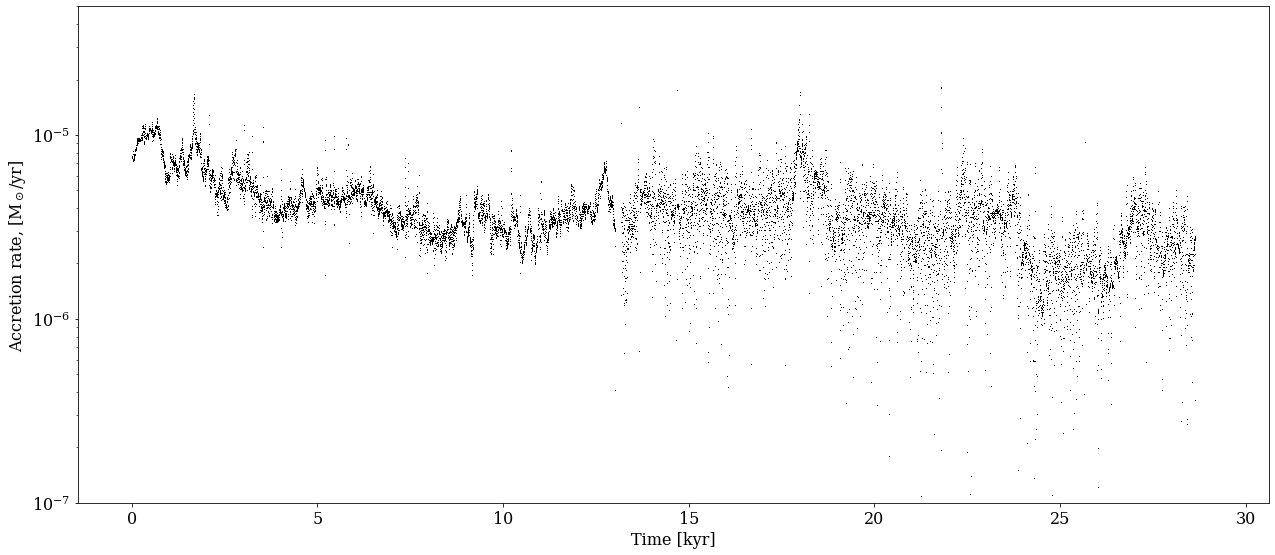

In [4]:
fig, axs = plt.subplots(figsize = (18, 8))

axs.set_xlabel('Time [kyr]', fontsize=16); axs.set_ylabel('Accretion rate, [M$_\odot$/yr]', fontsize=16);

axs.set(ylim = (1e-7, 5e-5))

axs.semilogy((data.t_eval - data.t_eval[0]) *1e-3, data.sink_accretion, ',', color = 'black')

plt.tight_layout()

In [40]:
start = 343; end = 400
t_eval = []; sink_mass = []
for io in tqdm.tqdm(range(start, end + 1)):
    sn = dis.snapshot(io, data.sn.run)
    unique_sink_datapoints = [sink_eval for i, sink_eval in enumerate(sn.sinks[data.sink_id]) if sn.sinks[data.sink_id][i].time !=sn.sinks[data.sink_id][i-1].time]

    sink_times = [_.time for _ in unique_sink_datapoints] 
    sink_masses = [_.mass for _ in unique_sink_datapoints]

    t_eval.extend(sink_times)
    sink_mass.extend(sink_masses)        
    
t_eval = np.asarray(t_eval).flatten() * data.yr_time
sink_mass = np.asarray(sink_mass).flatten() * data.msun_mass

sink_accretion = np.gradient(sink_mass, t_eval, edge_order = 2)


100%|██████████| 58/58 [04:17<00:00,  4.43s/it]


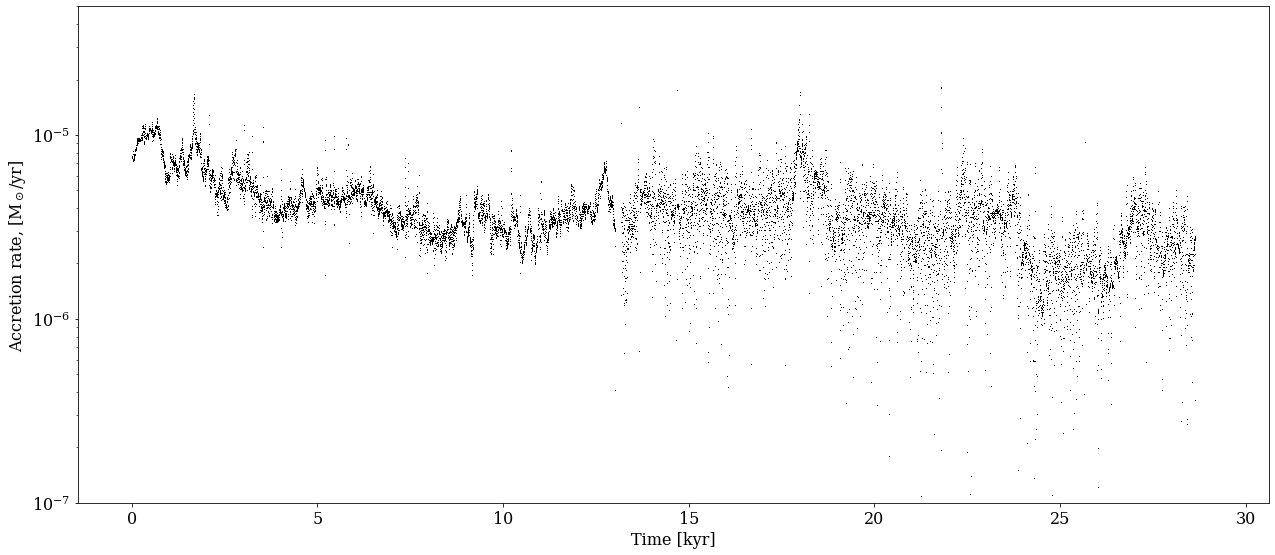

In [48]:
fig, axs = plt.subplots(figsize = (18, 8))

axs.set_xlabel('Time [kyr]', fontsize=16); axs.set_ylabel('Accretion rate, [M$_\odot$/yr]', fontsize=16);

axs.set(ylim = (1e-7, 5e-5))

axs.semilogy((t_eval - t_eval[0]) *1e-3, sink_accretion, ',', color = 'black')

plt.tight_layout()

[1.0819122728380783,
 1.0819123728380784,
 1.0819124728380785,
 1.0819125728380785,
 1.0819126728380786,
 1.0819127728380786,
 1.0819128728380787,
 1.0819129728380787,
 1.0819130728380788,
 1.0819131728380789,
 1.081913272838079,
 1.081913372838079,
 1.081913472838079,
 1.081913572838079,
 1.0819136728380792,
 1.0819137728380792,
 1.0819138728380793,
 1.0819139728380793,
 1.0819140728380794,
 1.0819141728380794,
 1.0819142728380795,
 1.0819143728380796,
 1.0819144728380796,
 1.0819145728380797,
 1.0819146728380797,
 1.0819147728380798,
 1.0819148728380799,
 1.08191497283808,
 1.08191507283808,
 1.08191517283808,
 1.08191527283808,
 1.0819153728380801,
 1.0819154728380802,
 1.0819155728380803,
 1.0819156728380803,
 1.0819157728380804,
 1.0819158728380804,
 1.0819159728380805,
 1.0819160728380806,
 1.0819161728380806,
 1.0819162728380807,
 1.0819163728380807,
 1.0819164728380808,
 1.0819165728380808,
 1.081916672838081,
 1.081916772838081,
 1.081916872838081,
 1.081916972838081,
 1.08191